In [1]:
import torch
from torch_geometric.data import Data
import networkx as nx
from torch_geometric import utils
import pandas as pd

In [13]:
def cg_processing(df: pd.DataFrame):
    df["type_pre_eff"] = df["type_pre_eff"].astype(int)
    df["type_eff_eff"] = df["type_eff_eff"].astype(int)
    return df

In [17]:

cg1 = pd.read_csv('cgs/cg1_cg.csv', header=0)
cg1 = cg_processing(cg1)
cg2 = pd.read_csv('cgs/cg2_cg.csv', header=0)
cg2 = cg_processing(cg2)
cg3 = pd.read_csv('cgs/cg3_cg.csv', header=0)
cg3 = cg_processing(cg3)

# get sas file
# generate variables and cg
# insert into grapgh variables features [3,4,1,....]
# insert into grapgh edges
# insert into grapgh edge labels

with open("cgs/current_test.txt") as file:
    lines = file.readlines()

# lines = list(map(lambda x: x.split(" ")[0:2], lines))
# lines = list(map(lambda x: (int(x[0]), int(x[1])), lines))
edges_and_types = map(lambda x: [int(character) for character in x.split(" ")[0:3]], lines)
edges_and_types = list(edges_and_types)

edges = []
edge_types = []
for edge_out, edge_in, feature in edges_and_types:
    edges.append((edge_out, edge_in))
    edge_types.append(feature)

target_variable = map(lambda x: 0 if x.split(" ")[3].strip() == "False" else 1, lines)
target_variable = list(target_variable)

data = Data(
    edge_index=torch.tensor(edges, dtype=torch.long).t().contiguous(),
    edge_attr=[len(edges), 1],
    y=target_variable
)

cg1_edges = cg1[["source", "destination"]].values
cg1_edges

data = Data(
    edge_index=torch.tensor(cg1_edges, dtype=torch.long).t().contiguous(),
)

# for edge, edge_type, y in zip(edges, edge_types, target_variable):
#     print(edge, edge_type, y)



,source,destination,type_pre_eff,type_eff_eff,label
0,7,11,1,0,True
1,3,11,1,1,True
2,4,10,1,1,True
3,7,10,1,0,True
4,6,9,1,0,True


/Users/bartoszlachowicz/Desktop/CodeProjects/GraphNeuralNetworks-ICAPS/.venv/lib/python3.9/site-packages/torch_geometric/data/storage.py:271: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


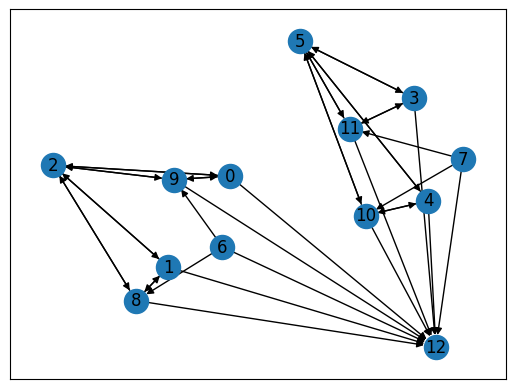

In [18]:
g = utils.to_networkx(data)

a = nx.draw_networkx(g)